In [1]:
from math import trunc
import unittest
import numpy as np
import scipy.sparse as sp
from qiskit.algorithms.evolvers import NumericalIntegrationImaginaryEvolver
from test.python.algorithms import QiskitAlgorithmsTestCase
from ddt import data, ddt, unpack
from numpy.testing import assert_raises

from qiskit.quantum_info import Statevector
from qiskit.algorithms.evolvers.evolution_problem import EvolutionProblem
from qiskit.circuit import Parameter
from qiskit.opflow import Y, Z, I, One, X, Zero, VectorStateFn, StateFn, SummedOp, PauliSumOp
from scipy.sparse.linalg import bicg,norm
import matplotlib.pyplot as plt
import time

In [2]:
def create_hamiltonian(num_sites):
    J = 0.1
    g = -1.0

    zz = ["I" * i + "ZZ" + "I" * (num_sites - i - 2) for i in range(num_sites - 1)]
    x = ["I" * i + "X" + "I" * (num_sites - i - 1) for i in range(num_sites)]
    return PauliSumOp.from_list(list(zip(zz, len(zz) * [J])) + list(zip(x, len(x) * [g])))


In [3]:
print(create_hamiltonian(5))

0.1 * ZZIII
+ 0.1 * IZZII
+ 0.1 * IIZZI
+ 0.1 * IIIZZ
- 1.0 * XIIII
- 1.0 * IXIII
- 1.0 * IIXII
- 1.0 * IIIXI
- 1.0 * IIIIX


In [4]:
def ground_state(t,iterations):
    initial_state = Zero^Zero^Zero^Zero^Zero

    evolution_problem = EvolutionProblem(create_hamiltonian(5),t,initial_state)
    classic_evolver = NumericalIntegrationImaginaryEvolver(timesteps=iterations)
    result = classic_evolver.evolve(evolution_problem)

    return result.evolved_state.to_matrix()
    

12.699606293110033


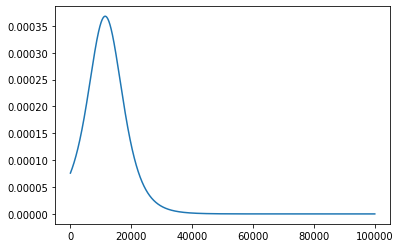

In [12]:
nqubits = 5
initial_state = Zero^nqubits
hamiltonian = create_hamiltonian(nqubits)
evolution_problem = EvolutionProblem(hamiltonian,1,initial_state, aux_operators={"Energy":hamiltonian})
print(sp.linalg.norm(evolution_problem.hamiltonian.to_spmatrix()))
classic_evolver = NumericalIntegrationImaginaryEvolver(timesteps=100000,threshold=1e-3,order="second")
result = classic_evolver.evolve(evolution_problem)
plt.plot(result.aux_ops_evaluated["Energy"][:-1]-result.aux_ops_evaluated["Energy"][1:])